In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset = pd.read_csv('Dataset/loan-train.csv')

In [3]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
dataset.shape

(614, 13)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


## Checking how the credit history affects the loan status

In [7]:
pd.crosstab(dataset['Credit_History'], dataset['Loan_Status'], margins=True)

Loan_Status,N,Y,All
Credit_History,,,
0.0,82,7,89
1.0,97,378,475
All,179,385,564


<Axes: >

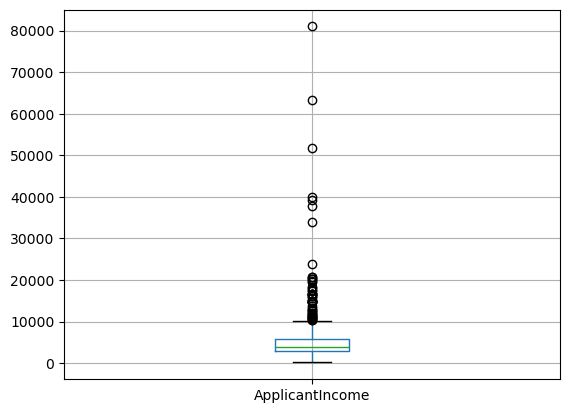

In [8]:
dataset.boxplot(column='ApplicantIncome')

<Axes: >

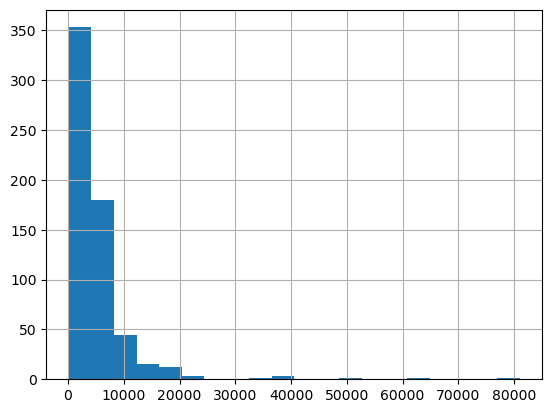

In [9]:
dataset['ApplicantIncome'].hist(bins=20)

<Axes: >

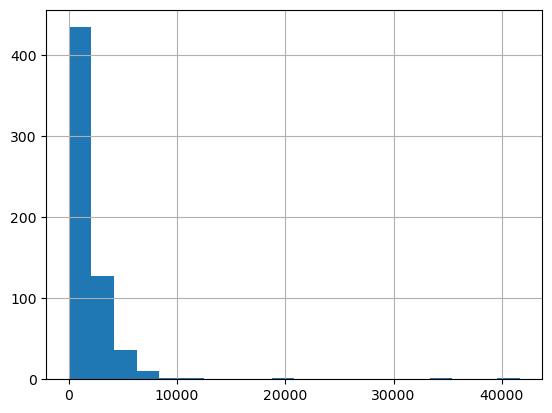

In [10]:
dataset['CoapplicantIncome'].hist(bins=20)

<Axes: title={'center': 'ApplicantIncome'}, xlabel='Education'>

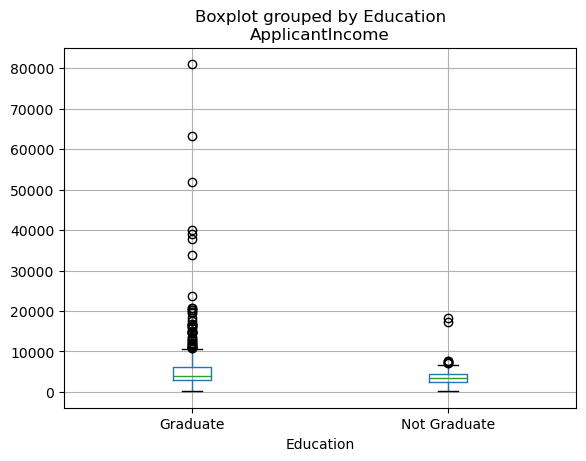

In [11]:
dataset.boxplot(column='ApplicantIncome', by='Education')

<Axes: >

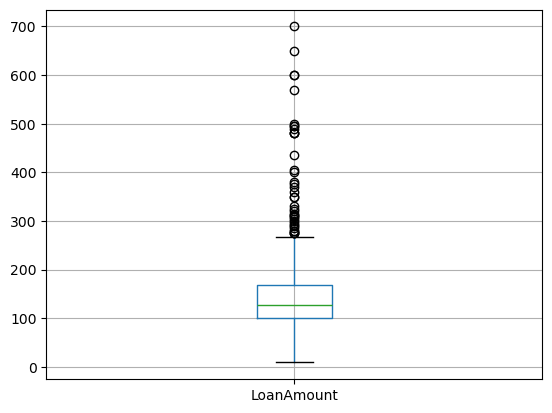

In [12]:
dataset.boxplot(column='LoanAmount')

<Axes: >

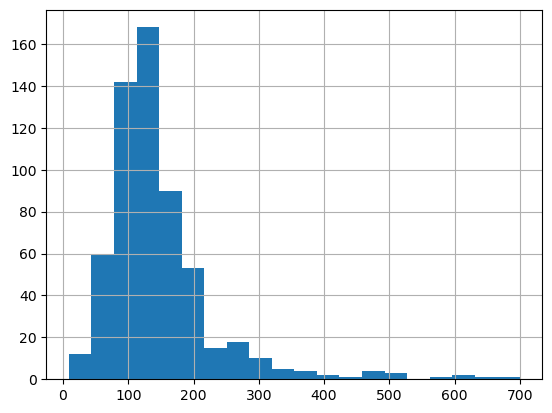

In [13]:
dataset['LoanAmount'].hist(bins=20)

<Axes: >

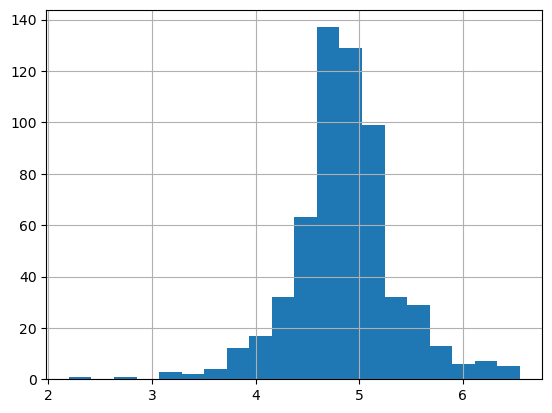

In [14]:
dataset['LoanAmount_Log'] = np.log(dataset['LoanAmount'])
dataset['LoanAmount_Log'].hist(bins=20)

In [15]:
dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
LoanAmount_Log       22
dtype: int64

In [16]:
dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)
dataset['Married'].fillna(dataset['Married'].mode()[0], inplace=True)
dataset['Dependents'].fillna(dataset['Dependents'].mode()[0], inplace=True)
dataset['Self_Employed'].fillna(dataset['Self_Employed'].mode()[0], inplace=True)
dataset.LoanAmount = dataset.LoanAmount.fillna(dataset.LoanAmount.mean())
dataset.LoanAmount_Log = dataset.LoanAmount.fillna(dataset.LoanAmount_Log.mean())
dataset['Loan_Amount_Term'].fillna(dataset['Loan_Amount_Term'].mode()[0], inplace=True)
dataset['Credit_History'].fillna(dataset['Credit_History'].mode()[0], inplace=True)

C:\Users\Mohit Bhatia\AppData\Local\Temp\ipykernel_18928\3851800367.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Gender'].fillna(dataset['Gender'].mode()[0], inplace=True)
C:\Users\Mohit Bhatia\AppData\Local\Temp\ipykernel_18928\3851800367.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values a

In [17]:
dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
LoanAmount_Log       0
dtype: int64

In [18]:
dataset['TotalIncome'] = dataset['ApplicantIncome'] + dataset['CoapplicantIncome']
dataset['TotalIncome_Log'] = np.log(dataset['TotalIncome'])

<Axes: >

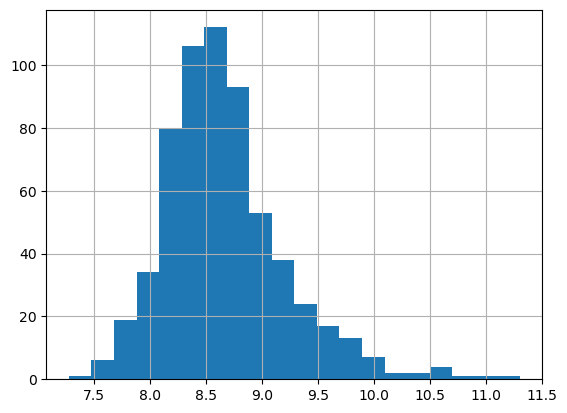

In [19]:
dataset['TotalIncome_Log'].hist(bins=20)

In [20]:
dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,LoanAmount_Log,TotalIncome,TotalIncome_Log
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y,146.412162,5849.0,8.674026
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N,128.000000,6091.0,8.714568
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y,66.000000,3000.0,8.006368
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y,120.000000,4941.0,8.505323
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y,141.000000,6000.0,8.699515


In [21]:
X = dataset.iloc[:, np.r_[1:5,9:11,13:15]].values
y = dataset.iloc[:,12]

In [22]:
X

array([['Male', 'No', '0', ..., 1.0, 146.41216216216216, 5849.0],
       ['Male', 'Yes', '1', ..., 1.0, 128.0, 6091.0],
       ['Male', 'Yes', '0', ..., 1.0, 66.0, 3000.0],
       ...,
       ['Male', 'Yes', '1', ..., 1.0, 253.0, 8312.0],
       ['Male', 'Yes', '2', ..., 1.0, 187.0, 7583.0],
       ['Female', 'No', '0', ..., 0.0, 133.0, 4583.0]], dtype=object)

In [23]:
y

0      Y
1      N
2      Y
3      Y
4      Y
      ..
609    Y
610    Y
611    Y
612    Y
613    N
Name: Loan_Status, Length: 614, dtype: object

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [25]:
print(X_train)

[['Male' 'Yes' '0' ... 1.0 131.0 5858.0]
 ['Male' 'No' '1' ... 1.0 196.0 11250.0]
 ['Male' 'Yes' '0' ... 0.0 149.0 5681.0]
 ...
 ['Male' 'Yes' '3+' ... 1.0 200.0 8334.0]
 ['Male' 'Yes' '0' ... 1.0 160.0 6033.0]
 ['Female' 'Yes' '0' ... 1.0 182.0 6486.0]]


## Label Encoding

In [26]:
from sklearn.preprocessing import LabelEncoder
labelencoder_X = LabelEncoder()

In [27]:
for i in range(0, 5):
    X_train[:, i] = labelencoder_X.fit_transform(X_train[:,i])

In [28]:
X_train[:, 7] = labelencoder_X.fit_transform(X_train[:, 7])

In [29]:
X_train

array([[1, 1, 0, ..., 1.0, 131.0, 267],
       [1, 0, 1, ..., 1.0, 196.0, 407],
       [1, 1, 0, ..., 0.0, 149.0, 249],
       ...,
       [1, 1, 3, ..., 1.0, 200.0, 363],
       [1, 1, 0, ..., 1.0, 160.0, 273],
       [0, 1, 0, ..., 1.0, 182.0, 301]], dtype=object)

In [30]:
labelencoder_y = LabelEncoder()
y_train = labelencoder_y.fit_transform(y_train)

In [31]:
y_train

array([1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1,

In [32]:
for i in range(0, 5):
    X_test[:, i] = labelencoder_X.fit_transform(X_test[:,i])

In [33]:
X_test[:, 7] = labelencoder_X.fit_transform(X_test[:, 7])

In [34]:
y_test = labelencoder_y.fit_transform(y_test)

In [35]:
X_test

array([[1, 0, 0, 0, 5, 1.0, 84.0, 85],
       [0, 0, 0, 0, 5, 1.0, 112.0, 28],
       [1, 1, 0, 0, 5, 1.0, 324.0, 104],
       [1, 1, 0, 0, 5, 1.0, 110.0, 80],
       [1, 1, 2, 0, 5, 1.0, 97.0, 22],
       [1, 1, 0, 1, 3, 0.0, 165.0, 70],
       [1, 1, 3, 0, 3, 1.0, 157.0, 77],
       [1, 0, 0, 0, 5, 1.0, 405.0, 114],
       [1, 0, 0, 0, 5, 0.0, 124.0, 53],
       [1, 1, 0, 0, 5, 1.0, 128.0, 55],
       [0, 0, 0, 0, 5, 1.0, 84.0, 4],
       [1, 1, 1, 0, 5, 1.0, 95.0, 2],
       [0, 0, 0, 0, 5, 1.0, 280.0, 96],
       [1, 1, 2, 0, 5, 1.0, 236.0, 97],
       [1, 1, 0, 0, 5, 1.0, 96.0, 117],
       [1, 1, 1, 0, 5, 1.0, 67.0, 22],
       [1, 0, 1, 1, 5, 1.0, 190.0, 32],
       [1, 0, 0, 1, 5, 1.0, 132.0, 25],
       [0, 0, 0, 0, 5, 1.0, 93.0, 1],
       [1, 1, 0, 1, 5, 0.0, 181.0, 44],
       [0, 1, 0, 0, 5, 0.0, 120.0, 71],
       [1, 1, 0, 0, 5, 1.0, 143.0, 43],
       [1, 1, 2, 0, 5, 1.0, 108.0, 91],
       [1, 1, 2, 0, 5, 1.0, 165.0, 111],
       [1, 1, 0, 0, 5, 1.0, 58.0, 35],
       

In [36]:
y_test

array([1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

## Scaling Data

In [37]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

In [38]:
X_train = ss.fit_transform(X_train)
X_test = ss.fit_transform(X_test)

## Testing with Decision Tree Classification Algorithm

In [39]:
from sklearn.tree import DecisionTreeClassifier
DTC = DecisionTreeClassifier(criterion ='entropy', random_state=0)
DTC.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [40]:
y_pred = DTC.predict(X_test)

In [41]:
y_pred

array([1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1])

### Checking the accuracy of the model

In [42]:
from sklearn import metrics
print('The accuract of decision tree is: ', metrics.accuracy_score(y_pred, y_test))

The accuract of decision tree is:  0.7073170731707317


## Testing with Naive Bayes Classification

In [43]:
from sklearn.naive_bayes import GaussianNB
NBC = GaussianNB()
NBC.fit(X_train, y_train)

GaussianNB()

In [44]:
y_pred = NBC.predict(X_test)

In [45]:
y_pred

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1])

### Checking the accuracy of the model

In [46]:
from sklearn import metrics
print('The accuract of decision tree is: ', metrics.accuracy_score(y_pred, y_test))

The accuract of decision tree is:  0.8292682926829268


## Applying Naive Bayes Classification on Test Data

In [47]:
testdata = pd.read_csv('Dataset/loan-test.csv')

In [48]:
testdata.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [49]:
testdata.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

In [50]:
testdata['Gender'].fillna(testdata['Gender'].mode()[0], inplace=True)
testdata['Dependents'].fillna(testdata['Dependents'].mode()[0], inplace=True)
testdata['Self_Employed'].fillna(testdata['Self_Employed'].mode()[0], inplace=True)
testdata['Loan_Amount_Term'].fillna(testdata['Loan_Amount_Term'].mode()[0], inplace=True)
testdata['Credit_History'].fillna(testdata['Credit_History'].mode()[0], inplace=True)

C:\Users\Mohit Bhatia\AppData\Local\Temp\ipykernel_18928\3527194338.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  testdata['Gender'].fillna(testdata['Gender'].mode()[0], inplace=True)
C:\Users\Mohit Bhatia\AppData\Local\Temp\ipykernel_18928\3527194338.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values

In [51]:
testdata.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           5
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

<Axes: >

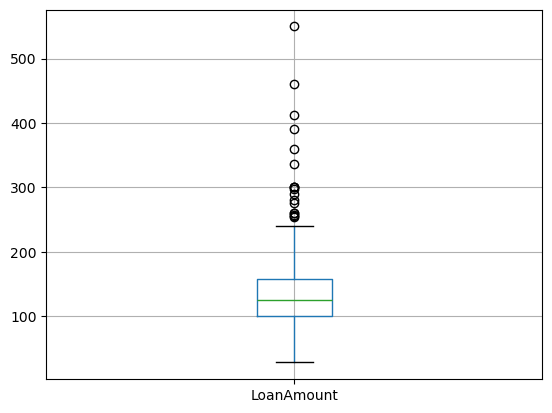

In [52]:
testdata.boxplot(column='LoanAmount')

<Axes: >

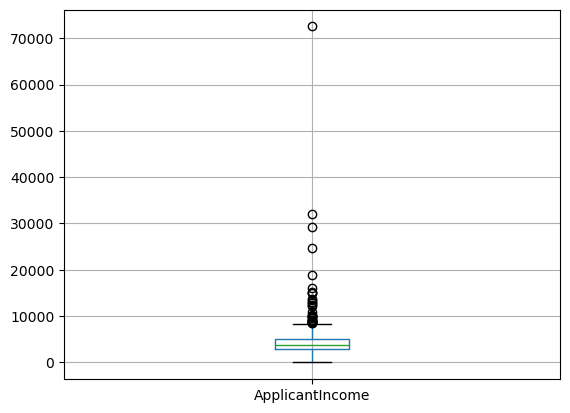

In [53]:
testdata.boxplot(column='ApplicantIncome')

In [54]:
testdata.LoanAmount = testdata.LoanAmount.fillna(testdata.LoanAmount.mean())

In [55]:
testdata['LoanAmount_Log'] = np.log(testdata['LoanAmount'])

In [56]:
testdata['TotalIncome'] = testdata['ApplicantIncome'] + testdata['CoapplicantIncome']
testdata['TotalIncome_Log'] = np.log(testdata['TotalIncome'])

In [57]:
test = testdata.iloc[:,np.r_[1:5,9:11,13:15]].values

In [58]:
for i in range(0,5):
    test[:,i] = labelencoder_X.fit_transform(test[:, i])

In [59]:
test[:, 7] = labelencoder_X.fit_transform(test[:, 7])

In [60]:
test

array([[1, 1, 0, ..., 1.0, 5720, 207],
       [1, 1, 1, ..., 1.0, 4576, 124],
       [1, 1, 2, ..., 1.0, 6800, 251],
       ...,
       [1, 0, 0, ..., 1.0, 5243, 174],
       [1, 1, 0, ..., 1.0, 7393, 268],
       [1, 0, 0, ..., 1.0, 9200, 311]], dtype=object)

In [61]:
test = ss.fit_transform(test)

In [62]:
pred = NBC.predict(test)

In [63]:
pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

### Saving the Model

In [64]:
import pickle

In [65]:
filename = 'Loan Eligibility Checker App.sav'
pickle.dump(NBC, open(filename, 'wb'))